In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
dir=r"C:\\Users\\vichu\\Documents\loan"
#os.chdir(r'C:\Users\prana\Desktop')
df = pd.read_csv(os.path.join(dir,"train.csv"))
df_test = pd.read_csv(os.path.join(dir,"test.csv"))
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [38]:
y=df.m13

In [39]:
pd.options.display.max_seq_items = 4000

In [40]:
df_test1 = pd.read_csv(os.path.join(dir,"test.csv"))

In [41]:
def get_continuous_features(df):
    return df.select_dtypes(include=['number']).columns

def get_categorical_features(df):
    return df.select_dtypes(exclude=['number']).columns

def cast_cont_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

In [42]:
cat_features=get_categorical_features(df)
cont_features=get_continuous_features(df)
print(cat_features)
print(cont_features)

Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')
Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')


In [43]:
from sklearn import preprocessing
for col in df[cat_features]:
    le_all=preprocessing.LabelEncoder()
    le_all.fit(df[col])
    print(le_all.classes_)
    df[col]=le_all.transform(df[col])

['X' 'Y' 'Z']
['Anderson-Taylor' 'Browning-Hart' 'Chapman-Mcmahon'
 'Cole, Brooks and Vincent' 'Edwards-Hoffman' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Nicholson Group' 'OTHER' 'Richards-Walters'
 'Richardson Ltd' 'Romero, Woods and Johnson'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Swanson, Newton and Miller' 'Taylor, Hunt and Rodriguez'
 'Thornton-Davis' 'Turner, Baldwin and Rhodes']
['2012-01-01' '2012-02-01' '2012-03-01']
['02/2012' '03/2012' '04/2012' '05/2012']
['A23' 'B12' 'C86']


In [44]:
df_test=df_test.replace(['Apr-12','Feb-12','Mar-12','May-12'],['04/2012','02/2012','03/2012','05/2012'])

df_test=df_test.replace(['01/01/12','01/02/12','01/03/12'],['2012-01-01','2012-02-01','2012-03-01'])

In [45]:
for col in df_test[cat_features]:
    le_all=preprocessing.LabelEncoder()
    le_all.fit(df_test[col])
    print(le_all.classes_)
    df_test[col]=le_all.transform(df_test[col])

['X' 'Y' 'Z']
['Anderson-Taylor' 'Browning-Hart' 'Chapman-Mcmahon'
 'Cole, Brooks and Vincent' 'Edwards-Hoffman' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Nicholson Group' 'OTHER' 'Richards-Walters'
 'Richardson Ltd' 'Romero, Woods and Johnson'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Swanson, Newton and Miller' 'Taylor, Hunt and Rodriguez'
 'Thornton-Davis' 'Turner, Baldwin and Rhodes']
['2012-01-01' '2012-02-01' '2012-03-01']
['02/2012' '03/2012' '04/2012' '05/2012']
['A23' 'B12' 'C86']


## FEATURE ENGG


In [46]:
df_train=df

In [47]:
df_train['emi']=df_train['unpaid_principal_bal']/df_train['loan_term']
df_test['emi']=df_test['unpaid_principal_bal']/df_test['loan_term']

In [48]:
df_train['credit_score']=df_train['borrower_credit_score']+df_train['co-borrower_credit_score']
df_test['credit_score']=df_test['borrower_credit_score']+df_test['co-borrower_credit_score']

In [49]:
df_train['total_amount']=df_train['unpaid_principal_bal']*(1+((df_train['interest_rate']/100)*(df_train['loan_term']/365)))
df_test['total_amount']=df_test['unpaid_principal_bal']*(1+((df_test['interest_rate']/100)*(df_test['loan_term']/365)))

In [50]:
mean_credit = df_train['credit_score'].mean(skipna=True)

In [51]:
df_train['credit_score']=df_train.credit_score.mask(df_train.credit_score == 0,mean_credit)
df_test['credit_score']=df_train.credit_score.mask(df_train.credit_score == 0,mean_credit)

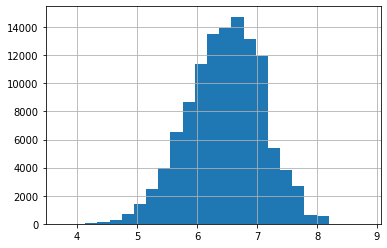

In [52]:
import numpy as np
df_train['emi_log'] = np.log(df_train['emi'])
df_test['emi_log'] = np.log(df_test['emi'])
df_train['emi_log'].hist(bins=25)

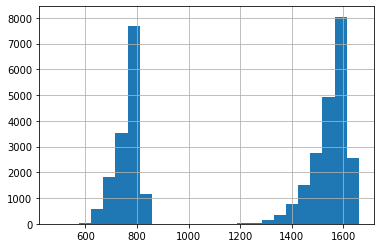

In [53]:
df_train['credit_score_log'] = np.log(df_train['credit_score'])
df_test['credit_score_log'] = np.log(df_test['credit_score'])
df_test['credit_score'].hist(bins=25)

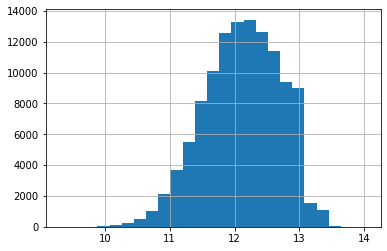

In [54]:
df_train['total_amount_log'] = np.log(df_train['total_amount'])
df_test['total_amount_log'] = np.log(df_test['total_amount'])
df_train['total_amount_log'].hist(bins=25)

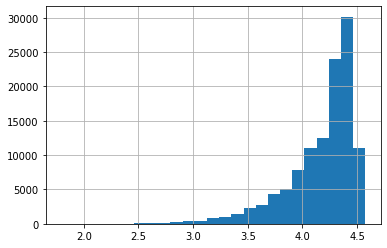

In [55]:
df_train['loan_to_value_log'] = np.log(df_train['loan_to_value'])
df_test['loan_to_value_log'] = np.log(df_test['loan_to_value'])
df_train['loan_to_value_log'].hist(bins=25)

In [56]:
df_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m11,m12,m13,emi,credit_score,total_amount,emi_log,credit_score_log,total_amount_log,loan_to_value_log
0,268055008619,2,18,4.250,214000,360,2,3,95,1.0,...,0,0,1,594.444444,694.0,222970.410959,6.387627,6.542472,12.314794,4.553877
1,672831657627,1,15,4.875,144000,360,0,1,72,1.0,...,1,0,1,400.000000,697.0,150923.835616,5.991465,6.546785,11.924531,4.276666
2,742515242108,2,17,3.250,366000,180,0,1,49,1.0,...,0,0,1,2033.333333,780.0,371866.027397,7.617432,6.659294,12.826289,3.891820
3,601385667462,0,8,4.750,135000,360,1,2,46,2.0,...,1,1,1,375.000000,1271.0,141324.657534,5.926926,7.147559,11.858815,3.828641
4,273870029961,0,8,4.750,124000,360,1,2,80,1.0,...,10,11,1,344.444444,681.0,129809.315068,5.841933,6.523562,11.773822,4.382027


In [68]:
df_train=df_train.rename(columns={'number_of_borrowers_1.0':'number_of_borrowers_1','number_of_borrowers_2.0':'number_of_borrowers_2'})

In [58]:
df_train=pd.get_dummies(df_train,columns=cat_features) 
df_test=pd.get_dummies(df_test,columns=cat_features)

In [59]:
df_train=df_train.drop(['loan_id','borrower_credit_score','co-borrower_credit_score','credit_score','emi',
                        'loan_to_value', 'unpaid_principal_bal','interest_rate','loan_term'], axis=1)
#df_train=df_train.drop('Loan_ID',axis=1) 
df_test=df_test.drop(['loan_id','borrower_credit_score','co-borrower_credit_score','credit_score','emi',
                        'loan_to_value', 'unpaid_principal_bal','interest_rate','loan_term'],axis=1)


In [60]:
df_train=pd.get_dummies(df_train,columns=['number_of_borrowers']) 
df_test=pd.get_dummies(df_test,columns=['number_of_borrowers'])

In [61]:
df_test.head()

,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,...,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2,number_of_borrowers_1,number_of_borrowers_2
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,34,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,24,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
from sklearn import ensemble,tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
import xgboost as xgb
#features=['m7', 'm8', 'm9', 'm10', 'm11', 'm12']
X = df_train.drop(columns=['m13','insurance_type','insurance_percent'])
X.head()
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model1=xgb.XGBClassifier(n_jobs=-1,random_state=42,learning_rate=0.01,n_estimators=1000)
    model1.fit(X, y)     
    pred_test1 = model1.predict(xvl)    
    score = accuracy_score(yvl,pred_test1)
    matrix=confusion_matrix(yvl,pred_test1)
    f1=f1_score(yvl,pred_test1)
    p=precision_score(yvl,pred_test1)
    r=recall_score(yvl,pred_test1)
    print('accuracy_score',score)
    print('matrix',matrix)
    print('f1',f1)
    print('pres',p)
    print('rec',r)
    i+=1


1 of kfold 5
accuracy_score 0.9965105759703614
matrix [[23078     7]
 [   74    54]]
f1 0.5714285714285714
pres 0.8852459016393442
rec 0.421875

2 of kfold 5
accuracy_score 0.9957349646734448
matrix [[23073    12]
 [   87    40]]
f1 0.446927374301676
pres 0.7692307692307693
rec 0.31496062992125984

3 of kfold 5


In [73]:
#df_test=df_test.drop(columns=['insurance_type','insurance_percent'])
pred_test1 = model1.predict(df_test)

In [74]:
np.bincount(pred_test1)

array([35789,    77], dtype=int64)

In [91]:
df_test1['m13']=pred_test1
df_test1.to_csv(os.path.join(dir,'submission.csv'), columns=['loan_id','m13'], index=False)

In [107]:
df_train['m10']=df_train['m10'].replace(8,7)

In [108]:
df_train['m10'].value_counts()

0    115613
1       325
2        54
3        21
7        16
4        15
6         8
5         6
Name: m10, dtype: int64

In [94]:
df_test['m10'].value_counts()

0    35738
1      101
2        9
3        7
6        3
5        3
4        3
7        2
Name: m10, dtype: int64

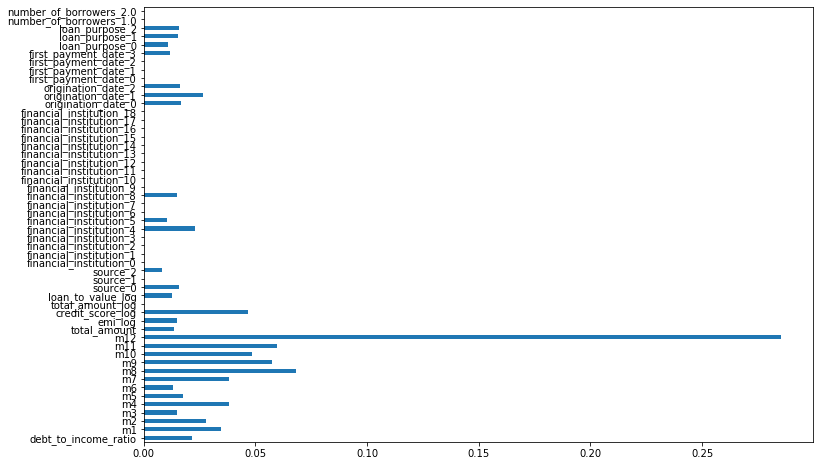

In [154]:
importances=pd.Series(model1.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [131]:
from catboost import CatBoostClassifier

In [140]:
m=CatBoostClassifier(n_estimators=1000,random_state=10,eval_metric='F1',learning_rate=0.1,
                     max_depth=6,od_wait=50,l2_leaf_reg=5,random_strength=100,use_best_model=True)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)

In [142]:
m.fit(X_train,y_train,eval_set=[(X,y),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

0:	learn: 0.0000000	test: 0.0000000	test1: 0.0000000	best: 0.0000000 (0)	total: 28.1ms	remaining: 28s
100:	learn: 0.0000000	test: 0.0000000	test1: 0.0000000	best: 0.0000000 (0)	total: 3.37s	remaining: 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0
bestIteration = 0

Shrink model to first 1 iterations.
